In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image

In [4]:
# First load data

image_dir = "CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


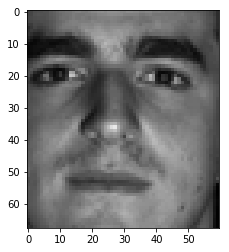

In [5]:
plt.imshow(imgs[10]) # Display first image

In [6]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width*height

# Compute input matrix X : n x d
X_list = [np.reshape(imgs[i].getdata(), wh) for i in range(n)]
X = np.array(X_list)
print(X.shape)

(38, 4080)


In [7]:
# Subtract the mean image from input matrix X
mX = np.mean(X, axis=0)
print(mX.shape)
X = X - mX # broadcasting

(4080,)


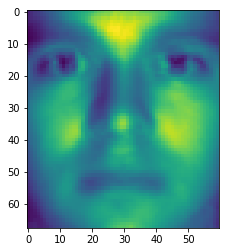

In [8]:
# reshape and visualize the mean image
mX_2d = np.reshape(mX, (height, width))
plt.imshow(mX_2d)

(4080, 4080)


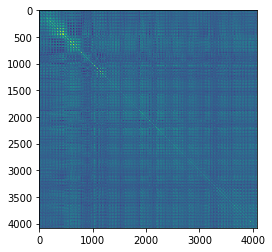

In [9]:
# compute covariance matrix: 1/n * X * X^T, if X is a d x n matrix
covariance = np.cov(X.T) # we transpose to get a d x n matrix required by np.cov
print(covariance.shape)
plt.imshow(covariance)

In [10]:
# Compute SVD of the covariance matrix
U, s, V = np.linalg.svd(covariance, full_matrices=True) # Sigma = U^T * diag(s) * V
U.shape, V.shape, s.shape

((4080, 4080), (4080, 4080), (4080,))

In [11]:
U2, s2, V2 = np.linalg.svd(X, full_matrices=True) # X = U^T * diag(s) * V
U2.shape, V2.shape, s2.shape

((38, 38), (4080, 4080), (38,))

In [12]:
# Home Exercise : V2 and V are the same. Why ?
d = V - V2
np.linalg.norm(d)/(4080*4080)

5.427937876634785e-06

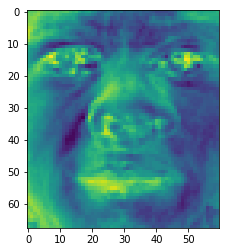

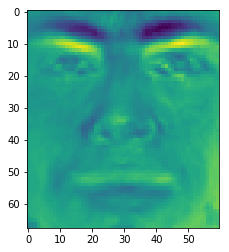

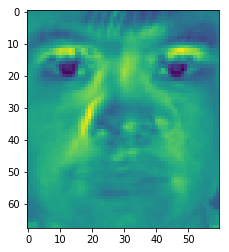

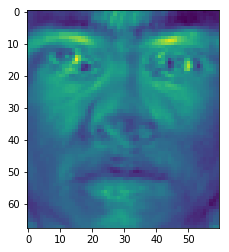

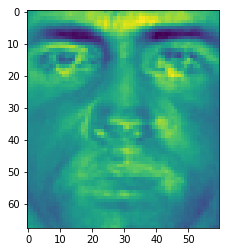

(340, 60)

In [13]:
# Extract first 5 eigenfaces which are represented by first 5 eigenvectors (columns of matrix U)
k =  5
list_eigenfaces = [np.reshape(U[:,i], (height, width)) for i in range(k)] # or np.array([0,1,2,3,4])
eigenfaces = np.reshape(np.asarray(list_eigenfaces), (k*height, width))
fig1 = plt.figure() # create a figure with the default size 
# plt.imshow(eigenfaces)
for i in range(k):
  plt.imshow(list_eigenfaces[i])
  plt.show()

fig1.savefig('eigenfaces.png', dpi = 1000)
eigenfaces.shape

In [14]:
# We build projection matrix U_k
U_k = np.array([U[:, i] for i in range(k)])
U_k.shape

(5, 4080)

In [15]:
# Perform image compression with PCA keeping top K eigenvalues
Z = U_k.dot(X.T)
Z.shape

(5, 38)

In [16]:
# Image 10 has now been compressed from size 4000 to size k. 
Z[:,10]

array([1017.7615182 , -338.19707529, -398.03980945, -543.38657495,
       -514.40537971])

In [17]:
#Perform image decompression (don't forget to add back the original mean of the data)
X_bar = U_k.T.dot(Z).T  + mX
X_bar.shape

(38, 4080)

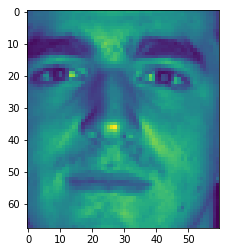

In [18]:
# We plot the original image to see how good is our decompression
img_idx = 10

first_img = np.reshape(X[img_idx,:] + mX, (height, width))
fig3 = plt.figure() # create a figure with the default size 
plt.imshow(first_img)

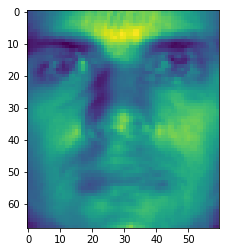

In [19]:
# Decompressed
first_img_decomp = np.reshape(X_bar[img_idx,:], (height, width))
fig2 = plt.figure() # create a figure with the default size 
plt.imshow(first_img_decomp)